In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie,axis
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv("COPD.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Age                                   1142 non-null   int64
 1   Intubation                            1142 non-null   int64
 2   rate_Po2                              1142 non-null   int64
 3   cancer                                1142 non-null   int64
 4   Liver disease                         1142 non-null   int64
 5   Diabetes                              1142 non-null   int64
 6   Hematologic_disease                   1142 non-null   int64
 7   Immune_Deficiency                     1142 non-null   int64
 8   peragnancy                            1142 non-null   int64
 9   Heart_disease                         1142 non-null   int64
 10  Renal_disease                         1142 non-null   int64
 11  Asthma                                1142 

In [ ]:
df['Age'].apply(int)

0       81
1       84
2       60
3       76
4       82
        ..
1137    45
1138    44
1139    34
1140    35
1141    28
Name: Age, Length: 1142, dtype: int64

In [ ]:
df["Intubation"]= df.Intubation.replace([1,2],[0,1])
df["rate_Po2"]= df.rate_Po2.replace( [1,2],[0,1])
df["gender"]= df.gender.replace( [1,2],[0,1])

In [ ]:
df.describe()

,Age,Intubation,rate_Po2,cancer,Liver disease,Diabetes,Hematologic_disease,Immune_Deficiency,peragnancy,Heart_disease,Renal_disease,Asthma,COPD,Chronic_neurological_disorders,Other_chronic_diseases,Condition when entering the hospital,hospital_duration,Cough,myalgia_or_fatigue,Shortness_of_breath,Loss_of_consciousness,Fever,sample for test,cantact_coronadisease,gender,death
count,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,51.679510,0.942207,0.292469,0.008757,0.002627,0.098949,0.012259,0.000876,0.005254,0.112084,0.017513,0.021016,0.014011,0.004378,0.118214,0.990368,4.603327,0.359895,0.154991,0.316988,0.017513,0.308231,0.883538,0.384413,0.517513,0.097198
std,19.027143,0.233454,0.455096,0.093207,0.051209,0.298725,0.110089,0.029591,0.072325,0.315608,0.131231,0.143500,0.117585,0.066053,0.323002,0.097713,8.420131,0.480180,0.362055,0.465506,0.131231,0.461965,0.320919,0.486669,0.499912,0.296357
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cor = df.corr()
cor

,Age,Intubation,rate_Po2,cancer,Liver disease,Diabetes,Hematologic_disease,Immune_Deficiency,peragnancy,Heart_disease,Renal_disease,Asthma,COPD,Chronic_neurological_disorders,Other_chronic_diseases,Condition when entering the hospital,hospital_duration,Cough,myalgia_or_fatigue,Shortness_of_breath,Loss_of_consciousness,Fever,sample for test,cantact_coronadisease,gender,death
Age,1.000000,-0.151363,0.403643,0.044578,0.010759,0.228858,0.108152,-0.002614,-0.068831,0.325901,0.099476,0.114815,0.103075,-0.022592,0.214373,-0.052573,0.237323,0.020310,0.022611,0.275874,0.132119,0.123719,0.019000,-0.338108,-0.103159,0.298198
Intubation,-0.151363,1.000000,-0.178982,-0.017000,0.012711,-0.031033,-0.006510,0.007332,0.017999,-0.042851,0.033066,0.010126,-0.130113,0.016424,-0.013923,0.359778,-0.107977,0.076252,0.012748,-0.032894,-0.224399,0.002789,-0.054823,0.080004,0.031209,-0.564788
rate_Po2,0.403643,-0.178982,1.000000,0.063541,-0.032996,0.115725,0.050825,0.046046,-0.046726,0.162090,0.060910,0.133944,0.087138,0.015676,0.140211,-0.153390,0.177822,-0.000822,-0.046633,0.273564,0.134285,0.083586,0.047398,-0.294385,-0.072613,0.295904
cancer,0.044578,-0.017000,0.063541,1.000000,-0.004824,0.031808,0.160355,-0.002782,-0.006831,-0.033394,-0.012549,-0.013771,-0.011204,-0.006233,0.023809,-0.086962,0.002196,0.027436,0.037661,0.016768,0.059104,-0.001675,0.004824,-0.016310,0.015515,0.064346
Liver disease,0.010759,0.012711,-0.032996,-0.004824,1.000000,0.040285,-0.005718,-0.001519,-0.003730,0.035993,-0.006852,-0.007519,-0.006118,-0.003403,-0.018791,0.005061,-0.024005,-0.002840,-0.021980,0.001803,-0.006852,-0.034258,-0.034697,-0.040556,0.015319,-0.016840
Diabetes,0.228858,-0.031033,0.115725,0.031808,0.040285,1.000000,0.016382,-0.009810,-0.024083,0.272693,0.179323,0.012783,-0.014551,0.022442,0.160244,0.002656,0.053598,-0.034632,0.052559,0.139793,0.045183,0.013781,0.019749,-0.153357,0.020664,0.099163
Hematologic_disease,0.108152,-0.006510,0.050825,0.160355,-0.005718,0.016382,1.000000,-0.003298,-0.008096,0.061316,0.045791,-0.016323,0.054425,-0.007388,-0.016144,0.010987,0.081835,0.015941,-0.047713,0.060920,0.045791,0.011801,-0.009167,-0.055320,-0.019829,0.044035
Immune_Deficiency,-0.002614,0.007332,0.046046,-0.002782,-0.001519,-0.009810,-0.003298,1.000000,-0.002152,-0.010518,-0.003953,-0.004338,-0.003529,-0.001963,-0.010840,0.002920,-0.016192,-0.022198,-0.012679,0.043456,-0.003953,0.044351,0.010748,-0.023394,-0.030660,-0.009714
peragnancy,-0.068831,0.017999,-0.046726,-0.006831,-0.003730,-0.024083,-0.008096,-0.002152,1.000000,-0.025821,-0.009703,-0.010648,-0.008663,-0.004819,0.010907,0.007167,-0.018162,0.046450,0.002345,0.002553,-0.009703,-0.022280,-0.011374,-0.032531,0.070173,-0.023846
Heart_disease,0.325901,-0.042851,0.162090,-0.033394,0.035993,0.272693,0.061316,-0.010518,-0.025821,1.000000,0.121850,0.083405,0.075730,0.018481,0.084843,-0.078639,0.179665,0.028531,0.016576,0.127812,0.100690,0.051374,-0.009456,-0.195173,-0.045781,0.070827


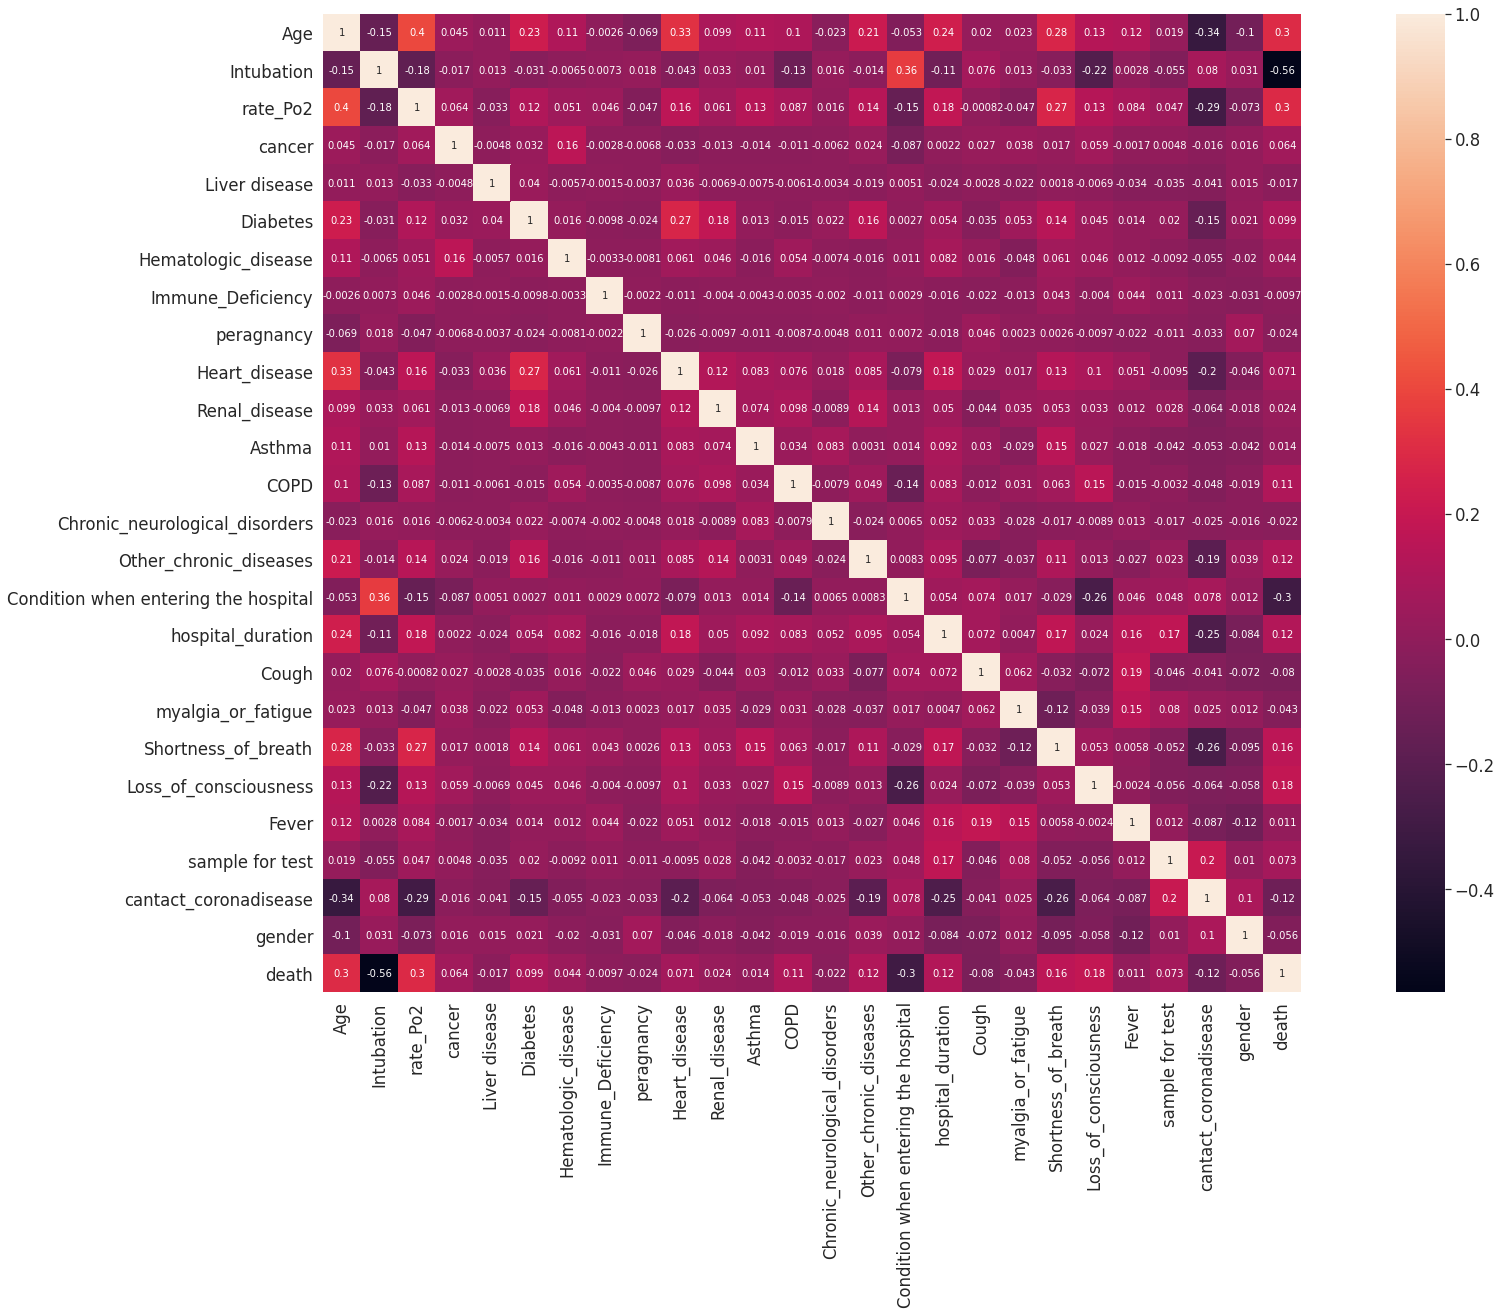

In [ ]:
fig = plt.subplots(figsize = (34,18))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

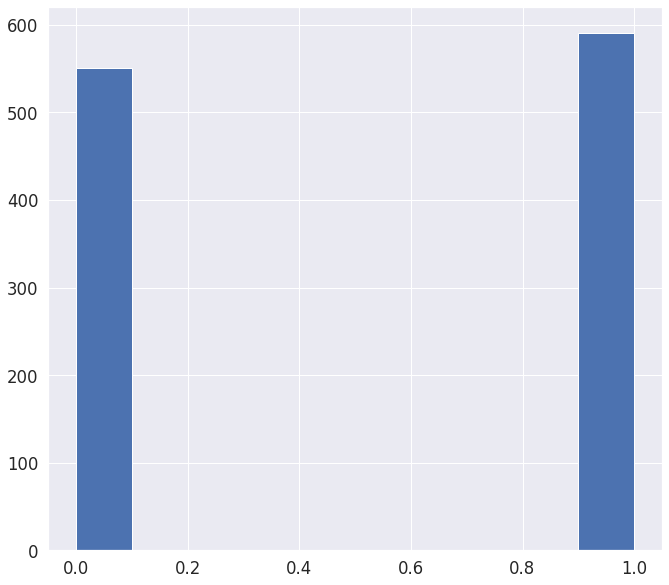

In [ ]:
df['gender'].hist()

In [ ]:
bins= [0,34,47,64,110]

In [ ]:
group_names = ['0 to 34','35 to 47','48 to 64','65+']
group_names

['0 to 34', '35 to 47', '48 to 64', '65+']

In [ ]:
df['age_groups'] = pd.cut(df['Age'], bins, labels = group_names)
df[['Age', 'age_groups']].head(10)

,Age,age_groups
0,81,65+
1,84,65+
2,60,48 to 64
3,76,65+
4,82,65+
5,68,65+
6,78,65+
7,88,65+
8,72,65+
9,68,65+


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


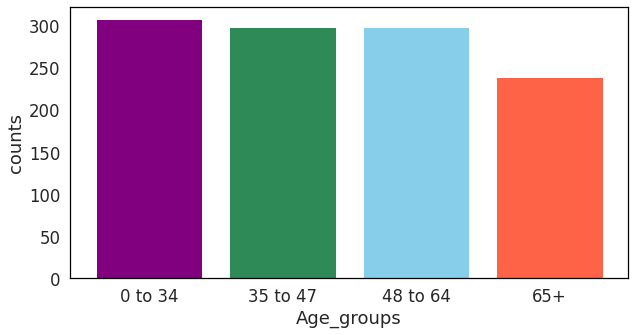

In [ ]:
import matplotlib

ax.set_facecolor('white')
matplotlib.rc('axes',edgecolor='black')
fig = plt.figure(figsize = (10, 5)) 
plt.bar(group_names,df['age_groups'].value_counts(), color=['purple', 'seagreen', 'skyblue', 'tomato'])
plt.xlabel('Age_groups')
plt.ylabel('counts')
ax = plt.axes()
ax.set_facecolor('white')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


([<matplotlib.patches.Wedge at 0x7fd924aac250>,
 [Text(0.5432415430122749, 2.3377101244477774, 'Male_Survivors'),
  Text(-2.304299145524367, 0.6709735076258009, 'Male_Deaths'),
  Text(-0.4463425463178676, -2.3581302617426547, 'Female_Survivors'),
  Text(2.3791069887509955, -0.3159904050381435, 'Female_Deaths')],
 [Text(0.49797141442791876, 2.1429009474104626, '43%'),
  Text(-2.11227421673067, 0.6150590486569841, '6%'),
  Text(-0.40914733412471194, -2.161619406597434, '48%'),
  Text(2.180848073021746, -0.28965787128496495, '4%')])

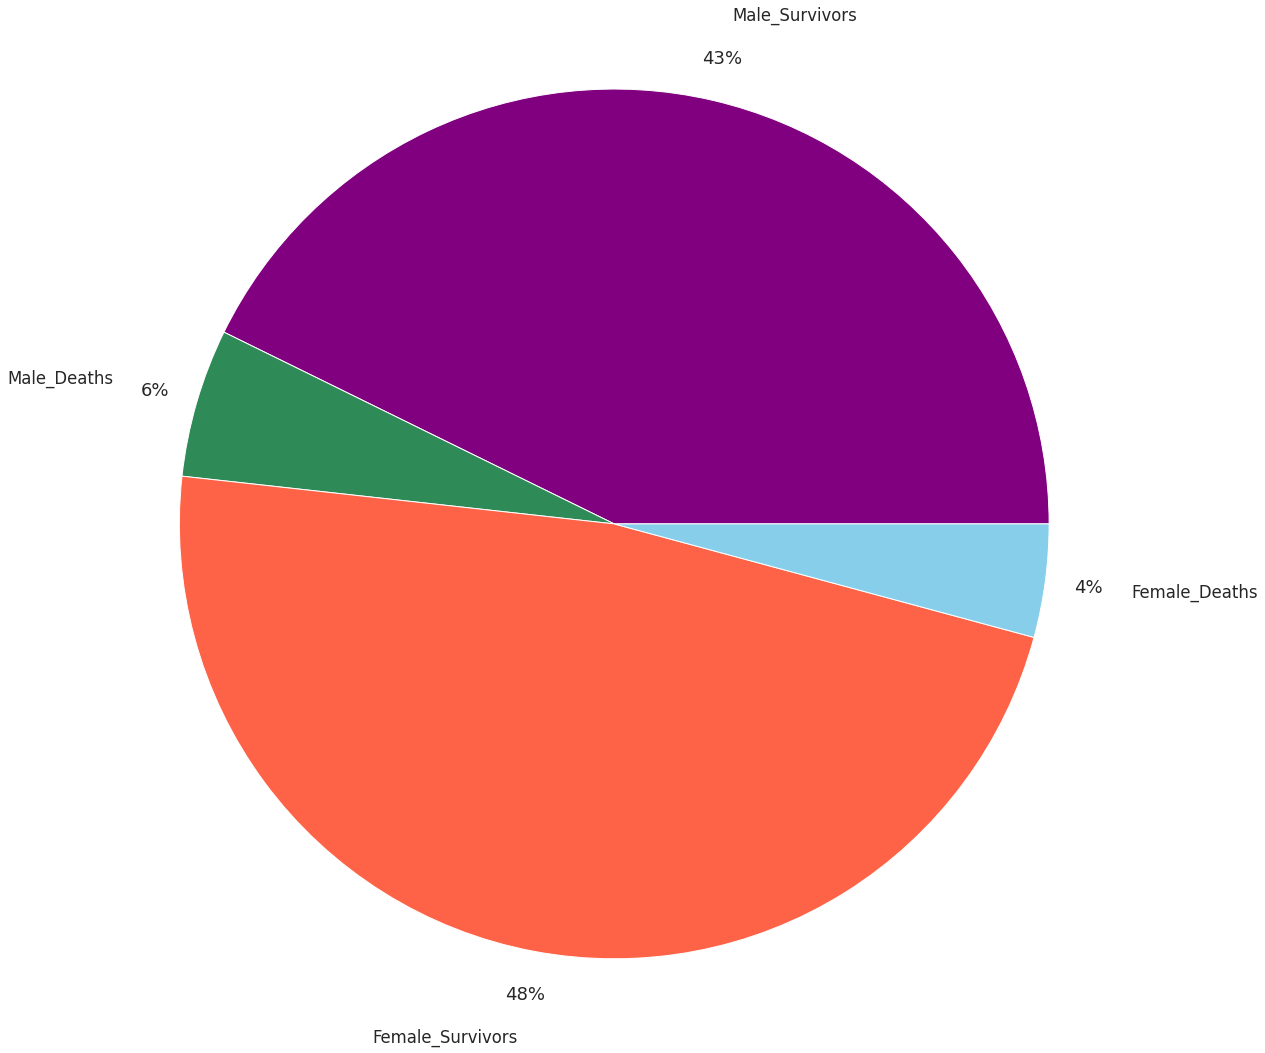

In [ ]:
male = df[df['gender']==0]
female = df[df['gender']==1]

male_survivors = male[df['death']==0]
male_death = male[df['death']==1]

female_survivors = female[df['death']==0]
female_death = female[df['death']==1]

values = [len(male_survivors),len(male_death), len(female_survivors), len(female_death)]
labels = ['Male_Survivors','Male_Deaths','Female_Survivors', 'Female_Deaths']

# pie(values, radius = 2, startangle = 0, labels = labels , autopct = '%1.01f%%', pctdistance = 1.1, labeldistance = 1.2)
colors = ['purple', 'seagreen', 'tomato','skyblue']

pie(values, radius = 2, startangle=0, labels=labels,autopct='%1.0f%%',colors=colors, pctdistance=1.1, labeldistance=1.2)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


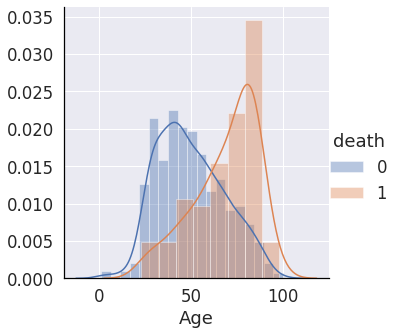

In [ ]:

sns.FacetGrid(df, hue="death", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

In [ ]:
pip install lifelines

In [ ]:
from lifelines import KaplanMeierFitter, CoxPHFitter

kmf= KaplanMeierFitter()

In [ ]:
kmf.fit(durations = df["hospital_duration"] ,event_observed= df["death"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1142 total observations, 1031 right-censored observations>

In [ ]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,589,17,572,1142,1142
1,57,13,44,0,553
2,45,6,39,0,496
3,55,3,52,0,451
4,70,9,61,0,396
5,54,11,43,0,326
6,40,10,30,0,272
7,22,2,20,0,232
8,26,7,19,0,210


In [ ]:
event_at_0  = kmf.event_table.iloc[0 ,:]
sur_for_0 = (event_at_0.at_risk - event_at_0.observed )/event_at_0.at_risk
sur_for_0

0.9851138353765324

In [ ]:
event_at_5  = kmf.event_table.iloc[1 ,:]
sur_for_5 = (event_at_5.at_risk - event_at_5.observed )/event_at_5.at_risk
sur_for_5

0.976491862567812

In [ ]:
event_at_11  = kmf.event_table.iloc[2 ,:]
sur_for_11 = (event_at_11.at_risk - event_at_11.observed )/event_at_11.at_risk
sur_for_11

0.9879032258064516

In [ ]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.985114
1.0,0.961956
2.0,0.950319
3.0,0.943998
4.0,0.922543
5.0,0.891414
6.0,0.858642
7.0,0.851240
8.0,0.822865


In [ ]:
kmf.median_survival_time_

37.0

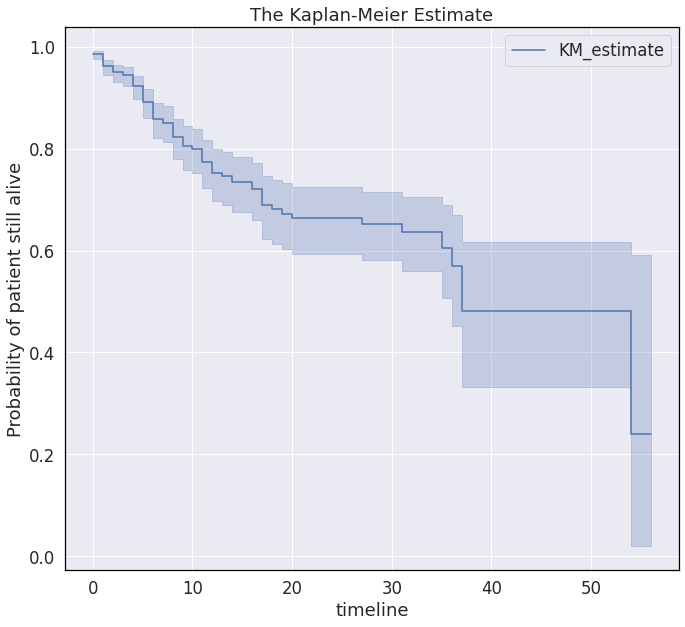

In [ ]:
kmf.plot()
plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Probability of patient still alive")
plt.show()

In [ ]:
kmf.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,0.976163,0.990720
1.0,0.944822,0.973842
2.0,0.930433,0.964628
3.0,0.922688,0.959562
4.0,0.896622,0.942174
5.0,0.859424,0.916479
6.0,0.820976,0.888922
7.0,0.812293,0.882692
8.0,0.779103,0.858749
9.0,0.758293,0.843581


Text(0.5, 1.0, 'Cumulative Density')

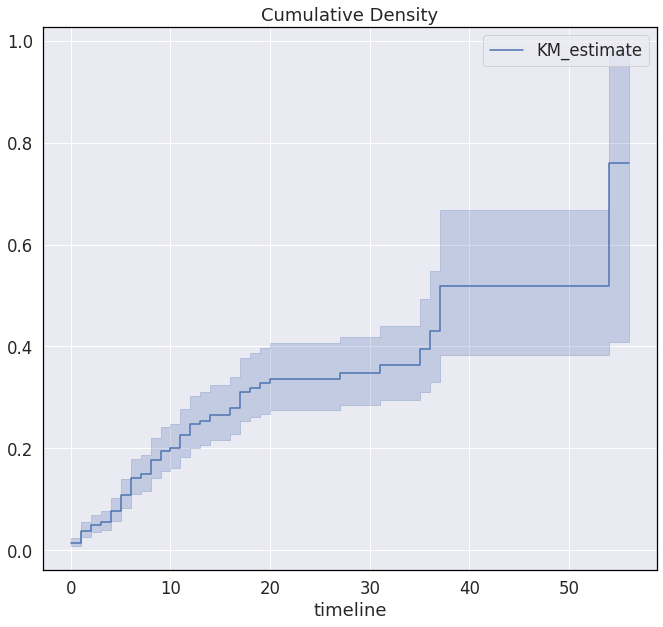

In [ ]:
kmf.plot_cumulative_density()
plt.title("Cumulative Density")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


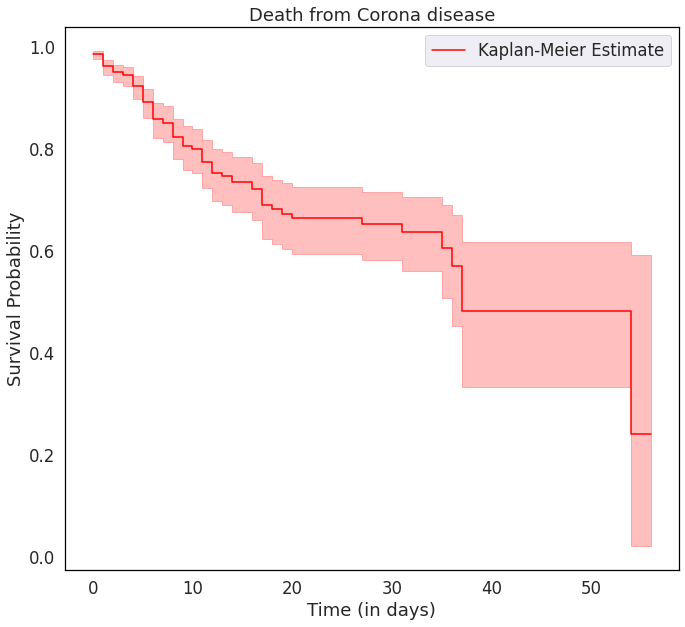

In [ ]:
dth_kmf = KaplanMeierFitter()
dth_kmf.fit(df['hospital_duration'], df['death'])

ax = dth_kmf.plot(color='red', label='Kaplan-Meier Estimate')
ax.set_xlabel('Time (in days)')
ax.set_ylabel('Survival Probability')
ax.set_title('Death from Corona disease')
ax = plt.axes()
ax.set_facecolor('white')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


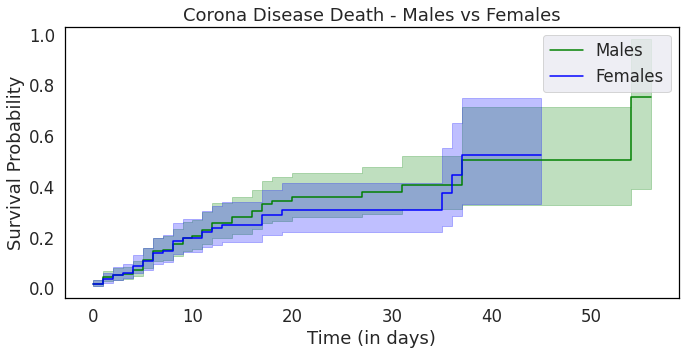

In [ ]:
dth_kmf_male, dth_kmf_female = KaplanMeierFitter(), KaplanMeierFitter()
dth_df_male = df[df['gender']==0]
dth_df_female = df[df['gender']==1]


dth_kmf_male.fit(dth_df_male['hospital_duration'], dth_df_male['death'])
dth_kmf_female.fit(dth_df_female['hospital_duration'], dth_df_female['death'])
plt.rcParams["figure.figsize"]=(11,5)
ax = dth_kmf_male.plot_cumulative_density(color="green", label='Males')
ax_2 = dth_kmf_female.plot_cumulative_density(color='blue', label='Females')
ax_2.set_xlabel('Time (in days)')
ax_2.set_ylabel('Survival Probability')
ax_2.set_title('Corona Disease Death - Males vs Females')
ax = plt.axes()
ax.set_facecolor('white')
plt.savefig('relapse_males_vs_females.png', dpi=300, bbox_inches='tight')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x1 = LabelEncoder()
df['age_groups'] = labelencoder_x1.fit_transform(df['age_groups'])

In [ ]:
df['age_groups'].value_counts()

3    307
2    298
1    298
0    239
Name: age_groups, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


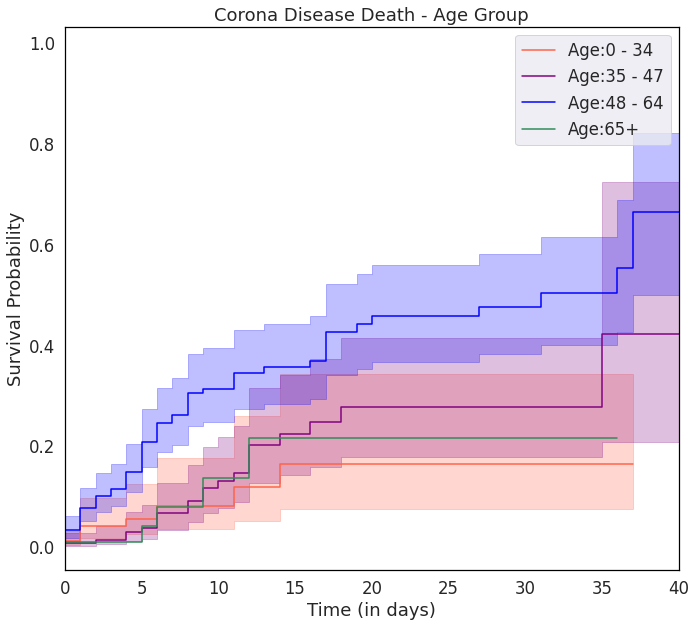

In [ ]:
dth_kmf_g1, dth_kmf_g2, dth_kmf_g3, dth_kmf_g4 = KaplanMeierFitter(), KaplanMeierFitter(),KaplanMeierFitter(), KaplanMeierFitter()
dth_df_g1 = df[df['age_groups']==0]
dth_df_g2 = df[df['age_groups']==1]
dth_df_g3 = df[df['age_groups']==2]
dth_df_g4 = df[df['age_groups']==3]


dth_kmf_g1.fit(dth_df_g1['hospital_duration'], dth_df_g1['death'])
dth_kmf_g2.fit(dth_df_g2['hospital_duration'], dth_df_g2['death'])
dth_kmf_g3.fit(dth_df_g3['hospital_duration'], dth_df_g3['death'])
dth_kmf_g4.fit(dth_df_g4['hospital_duration'], dth_df_g4['death'])
plt.rcParams["figure.figsize"]=(11,10)
plt.xlim(0,40)

ax2 = dth_kmf_g2.plot_cumulative_density(color='tomato', label='Age:0 - 34')
ax3 = dth_kmf_g3.plot_cumulative_density(color='purple', label='Age:35 - 47')
ax4 = dth_kmf_g4.plot_cumulative_density(color='blue', label='Age:48 - 64')
ax = dth_kmf_g1.plot_cumulative_density(color='seagreen', label='Age:65+',ci_show= False)
ax4.set_xlabel('Time (in days)')
ax4.set_ylabel('Survival Probability')
ax4.set_title('Corona Disease Death - Age Group')

ax = plt.axes()
ax.set_facecolor('white')
plt.savefig('age group.png', dpi=30, bbox_inches='tight')


In [ ]:
pip install pysurvival


In [ ]:
df.to_csv(r'copd.csv', index = False)

In [ ]:
df=pd.read_csv('balance (1).csv')

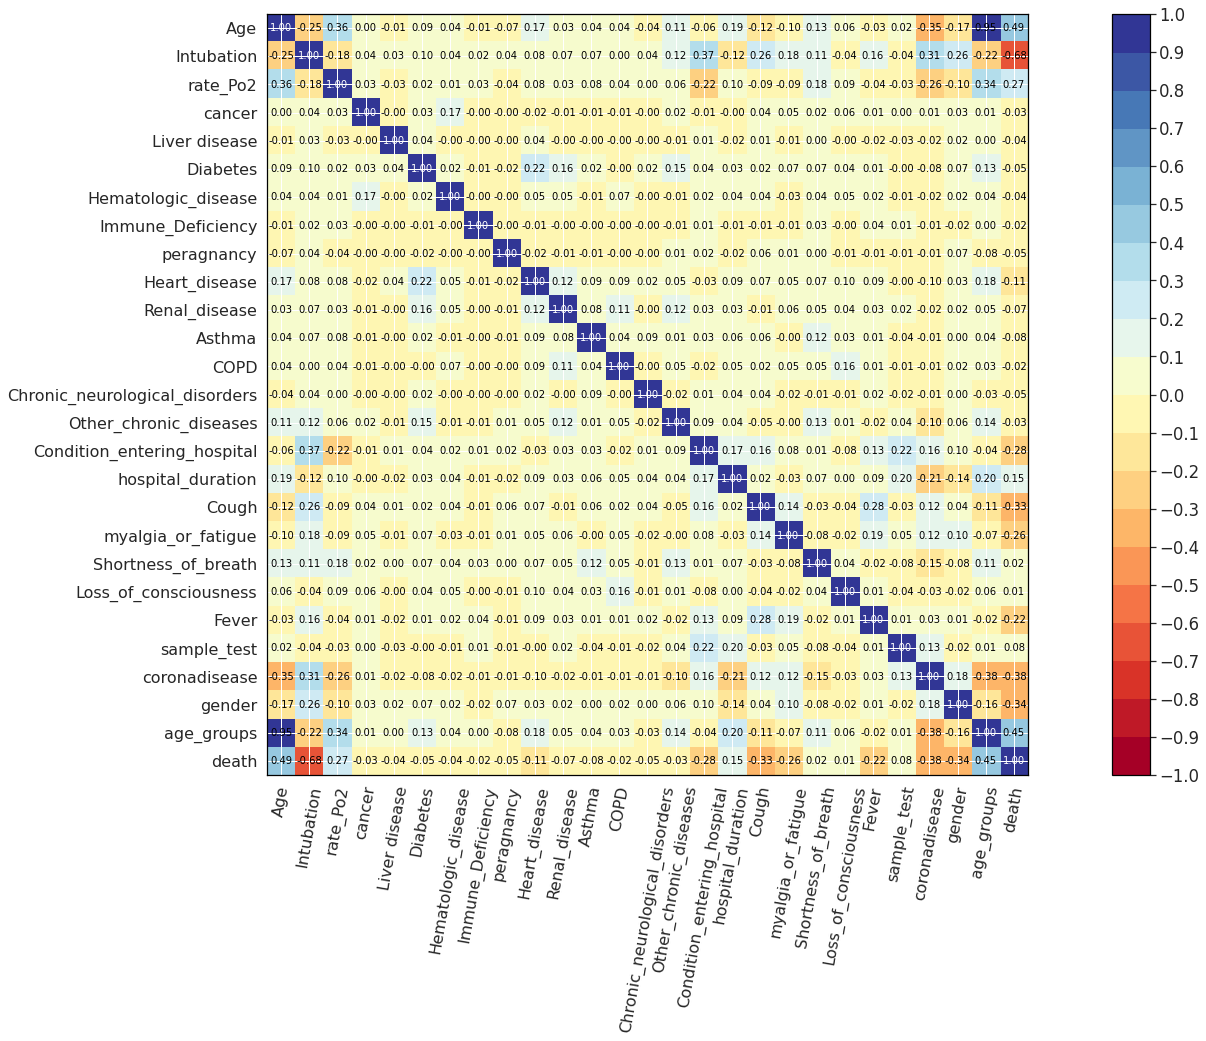

In [ ]:

from pysurvival.utils.display import correlation_matrix
correlation_matrix(df, figure_size=(30,14), text_fontsize=10)

In [ ]:
time_column = 'hospital_duration'
event_column = 'death'


# Creating the features
features = np.setdiff1d(df.columns, [time_column, event_column] ).tolist()

In [ ]:
features

['Age',
 'Asthma',
 'COPD',
 'Chronic_neurological_disorders',
 'Condition_entering_hospital',
 'Cough',
 'Diabetes',
 'Fever',
 'Heart_disease',
 'Hematologic_disease',
 'Immune_Deficiency',
 'Intubation',
 'Liver disease',
 'Loss_of_consciousness',
 'Other_chronic_diseases',
 'Renal_disease',
 'Shortness_of_breath',
 'age_groups',
 'cancer',
 'coronadisease',
 'gender',
 'myalgia_or_fatigue',
 'peragnancy',
 'rate_Po2',
 'sample_test']

In [ ]:
N=df.shape[0]
indexes_choices = np.random.choice(N, int(N*0.3), replace=False).tolist()


In [ ]:
from sklearn.model_selection import train_test_split
index_train, index_test = train_test_split( indexes_choices, test_size = 0.4)
data_train = df.loc[index_train].reset_index( drop = True )
data_test  = df.loc[index_test].reset_index( drop = True )

# Creating the X, T and E inputs
X_train, X_test = data_train[features], data_test[features]
T_train, T_test = data_train[time_column], data_test[time_column]
E_train, E_test = data_train[event_column], data_test[event_column]

In [ ]:
from pysurvival.models.survival_forest import ConditionalSurvivalForestModel

# Fitting the model
csf = ConditionalSurvivalForestModel(num_trees=200)
csf.fit(X_train, T_train, E_train, max_features='sqrt',
        alpha=0.05, minprop=0.1, max_depth=5, min_node_size=30)

ConditionalSurvivalForestModel

In [ ]:
from pysurvival.utils.metrics import concordance_index
c_index = concordance_index(csf, X_test, T_test, E_test)
print('C-index: {:.2f}'.format(c_index)) 

C-index: 0.77


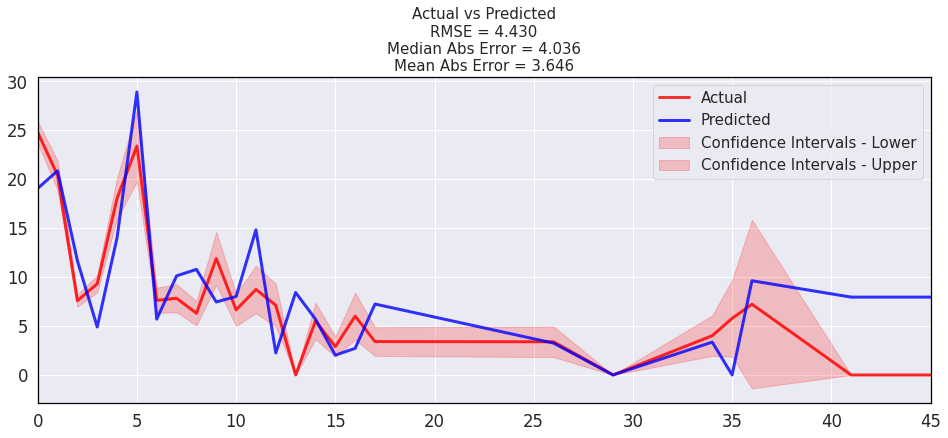

In [ ]:
from pysurvival.utils.display import compare_to_actual
results = compare_to_actual(csf, X_test, T_test, E_test,
                            is_at_risk = False,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])

Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 882.347 - ||grad||^2 = 195.93558
 * Iteration #2 - Loss = 882.055 - ||grad||^2 = 195.73944
 * Iteration #3 - Loss = 881.764 - ||grad||^2 = 195.54350
 * Iteration #4 - Loss = 881.475 - ||grad||^2 = 195.34775
 * Iteration #5 - Loss = 881.188 - ||grad||^2 = 195.15220
 * Iteration #6 - Loss = 880.903 - ||grad||^2 = 194.95685
 * Iteration #7 - Loss = 880.619 - ||grad||^2 = 194.76170
 * Iteration #8 - Loss = 880.338 - ||grad||^2 = 194.56674
 * Iteration #9 - Loss = 880.058 - ||grad||^2 = 194.37198
 * Iteration #10 - Loss = 879.780 - ||grad||^2 = 194.17742
 * Iteration #11 - Loss = 879.504 - ||grad||^2 = 193.98305
 * Iteration #12 - Loss = 879.229 - ||grad||^2 = 193.78888
 * Iteration #13 - Loss = 878.956 - ||grad||^2 = 193.59491
 * Iteration #14 - Loss = 878.685 - ||grad||^2 = 193.40112
 * Iteration #15 - Loss = 878.415 - ||grad||^2 = 193.20754
 * Iteration #16 - Loss = 878.147 - ||grad||^2 = 193.01415
 * Iteration #17 - Loss = 

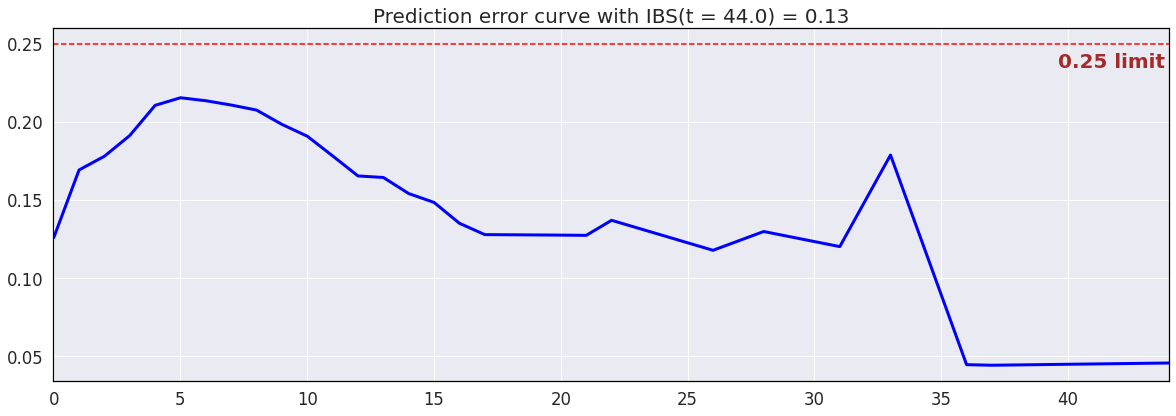

IBS: 0.13


In [ ]:

#### 4 - Creating an instance of the Cox PH model and fitting the data.
# Building the model
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import integrated_brier_score
from pysurvival.models.semi_parametric import CoxPHModel
coxph = CoxPHModel()
coxph.fit(X_train, T_train, E_train, lr=0.001, l2_reg=1e-2, init_method='zeros')


#### 5 - Cross Validation / Model Performances
c_index = concordance_index(coxph, X_test, T_test, E_test) #0.92
print('C-index: {:.2f}'.format(c_index))

ibs = integrated_brier_score(coxph, X_test, T_test, E_test, t_max=50,
            figure_size=(20, 6.5) )
print('IBS: {:.2f}'.format(ibs))

In [ ]:
from pysurvival.models.semi_parametric import NonLinearCoxPHModel
# Building the model
structure = [ {'activation': 'BentIdentity', 'num_units': 150},  ]
nonlinear_coxph = NonLinearCoxPHModel(structure=structure)
nonlinear_coxph.fit(X_train, T_train, E_train, lr=1e-3, init_method='xav_uniform')


NonLinearCoxPHModel( Layer(1): activation = BentIdentity, num_units = 150 )

C-index: 0.78


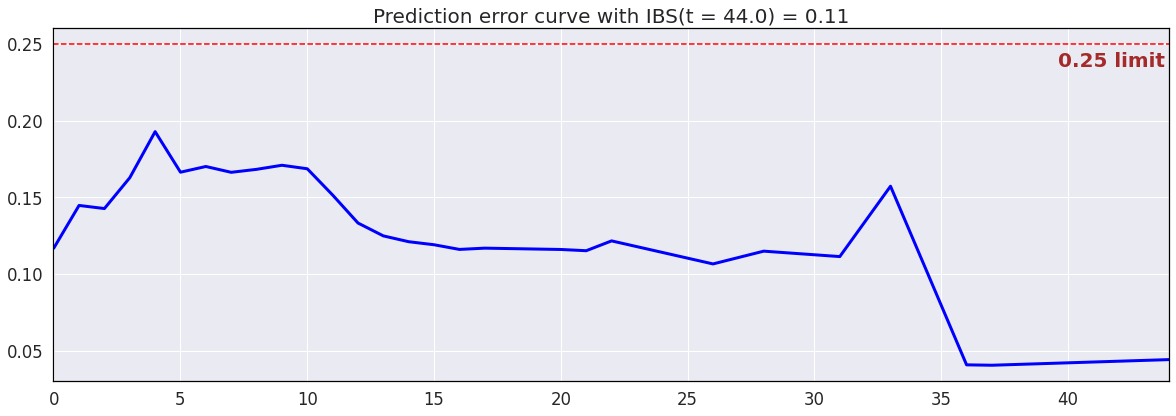

IBS: 0.11


In [ ]:
# Building the model
nonlinear_coxph = NonLinearCoxPHModel(structure=structure)
nonlinear_coxph.fit(X_train, T_train, E_train, lr=1e-3, init_method='xav_uniform')


#### 5 - Cross Validation / Model Performances
c_index = concordance_index(nonlinear_coxph, X_test, T_test, E_test) #0.81
print('C-index: {:.2f}'.format(c_index))

ibs = integrated_brier_score(nonlinear_coxph, X_test, T_test, E_test, t_max=50,
            figure_size=(20, 6.5) )
print('IBS: {:.2f}'.format(ibs))

C-index: 0.74


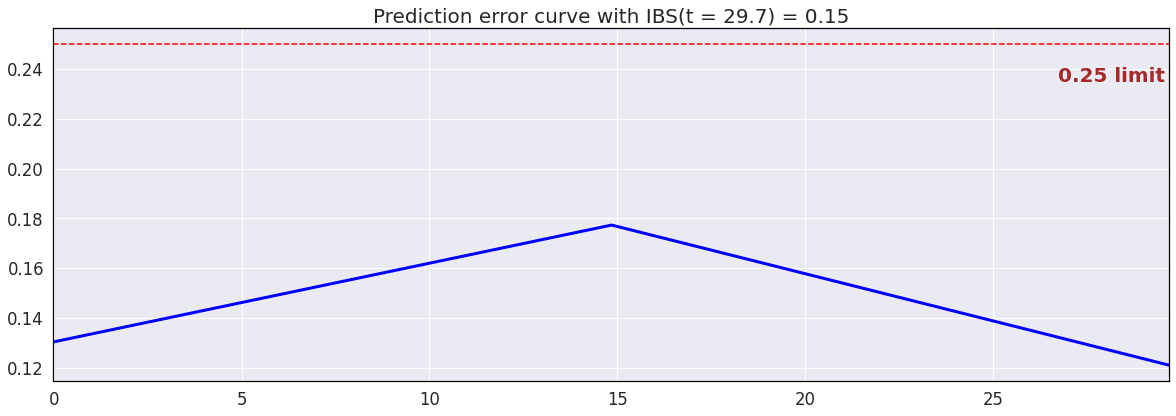

IBS: 0.15


In [ ]:
from pysurvival.models.multi_task import LinearMultiTaskModel
l_mtlr = LinearMultiTaskModel(bins=5)
l_mtlr.fit(X_train, T_train, E_train, lr=1e-3, init_method='orthogonal')


#### 5 - Cross Validation / Model Performances
c_index = concordance_index(l_mtlr, X_test, T_test, E_test) #0.95
print('C-index: {:.2f}'.format(c_index))

ibs = integrated_brier_score(l_mtlr, X_test, T_test, E_test, t_max=30,
            figure_size=(20, 6.5) )
print('IBS: {:.2f}'.format(ibs))

C-index: 0.75


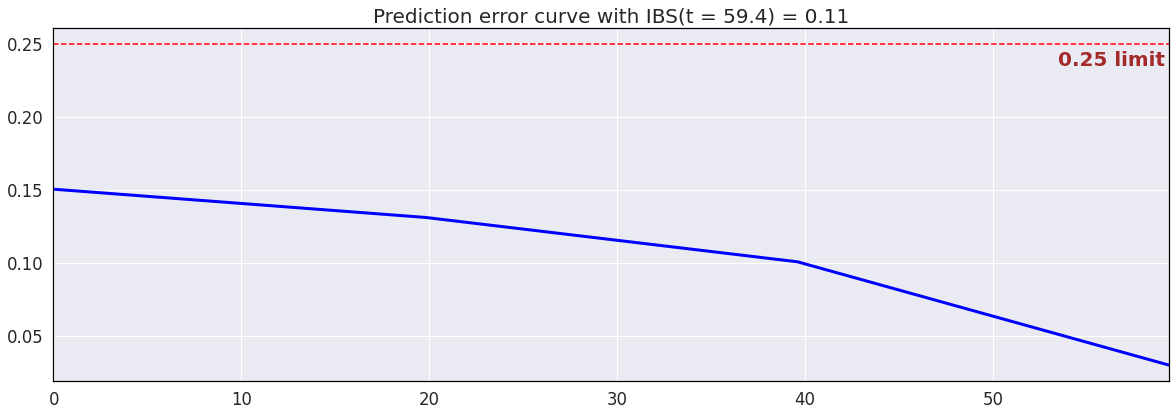

IBS: 0.11


In [ ]:
from pysurvival.models.multi_task import NeuralMultiTaskModel
structure = [ {'activation': 'ReLU', 'num_units': 150},  ]

# Building the model
n_mtlr = NeuralMultiTaskModel(structure=structure, bins=4)
n_mtlr.fit(X_train, T_train, E_train, lr=1e-3, num_epochs = 500,
           init_method='orthogonal', optimizer = 'rprop')


#### 5 - Cross Validation / Model Performances
c_index = concordance_index(n_mtlr, X_test, T_test, E_test) #0.68
print('C-index: {:.2f}'.format(c_index))

ibs = integrated_brier_score(n_mtlr, X_test, T_test, E_test, t_max=60,
            figure_size=(20, 6.5) )
print('IBS: {:.2f}'.format(ibs))

C-index: 0.74


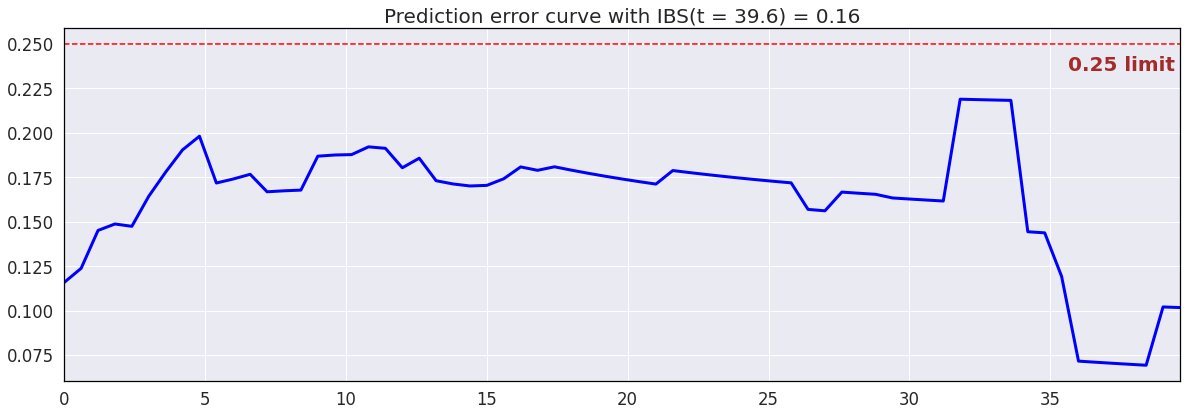

IBS: 0.16


In [ ]:
from pysurvival.models.parametric import GompertzModel
gomp_model = GompertzModel()
gomp_model.fit(X_train, T_train, E_train, lr=1e-3, init_method='zeros',
    optimizer ='adam', l2_reg = 1e-3, num_epochs=2000)


#### 5 - Cross Validation / Model Performances
c_index = concordance_index(gomp_model, X_test, T_test, E_test) #0.77
print('C-index: {:.2f}'.format(c_index))

ibs = integrated_brier_score(gomp_model, X_test, T_test, E_test, t_max=40,
            figure_size=(20, 6.5) )
print('IBS: {:.2f}'.format(ibs))

C-index: 0.77


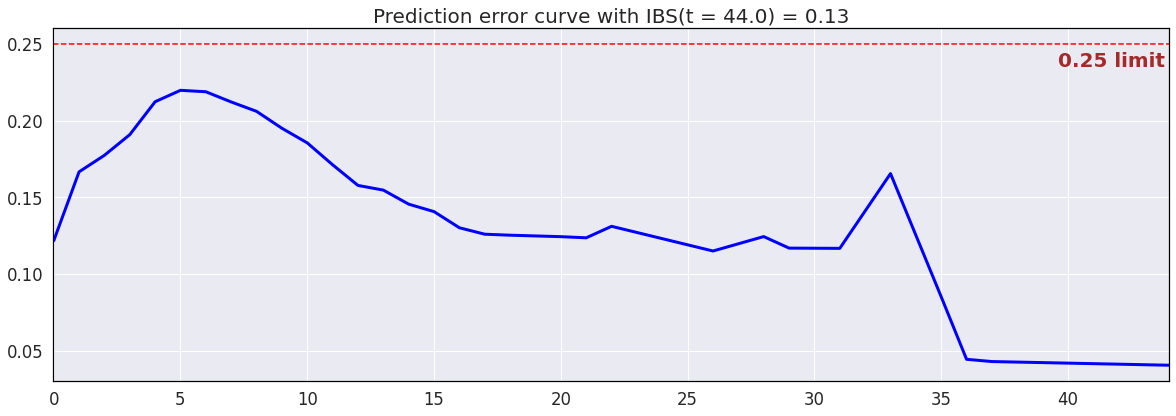

IBS: 0.13


In [ ]:
from pysurvival.models.survival_forest import ConditionalSurvivalForestModel
csf = ConditionalSurvivalForestModel(num_trees=200)
csf.fit(X_train, T_train, E_train,
        max_features="sqrt", max_depth=5, min_node_size=20,
        alpha = 0.05, minprop=0.1)


#### 5 - Cross Validation / Model Performances
c_index = concordance_index(csf, X_test, T_test, E_test) #0.81
print('C-index: {:.2f}'.format(c_index))

ibs = integrated_brier_score(csf, X_test, T_test, E_test, t_max=50,
            figure_size=(20, 6.5) )
print('IBS: {:.2f}'.format(ibs))

C-index: 0.75


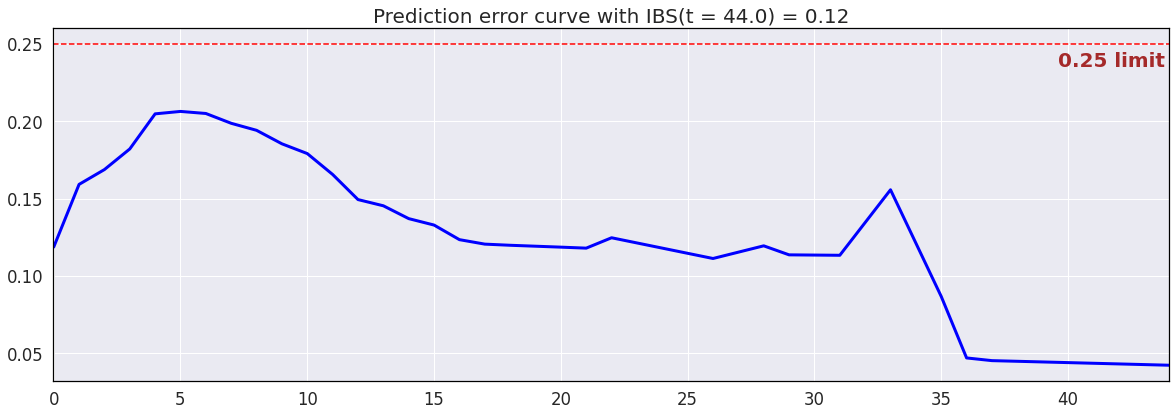

IBS: 0.12


In [ ]:
from pysurvival.models.survival_forest import ExtraSurvivalTreesModel
xst = ExtraSurvivalTreesModel(num_trees=200)
xst.fit(X_train, T_train, E_train,
        max_features="sqrt", max_depth=5, min_node_size=20,
        num_random_splits = 1000)


#### 5 - Cross Validation / Model Performances
c_index = concordance_index(xst, X_test, T_test, E_test) #0.81
print('C-index: {:.2f}'.format(c_index))

ibs = integrated_brier_score(xst, X_test, T_test, E_test, t_max=50,
            figure_size=(20, 6.5) )
print('IBS: {:.2f}'.format(ibs))

C-index: 0.74


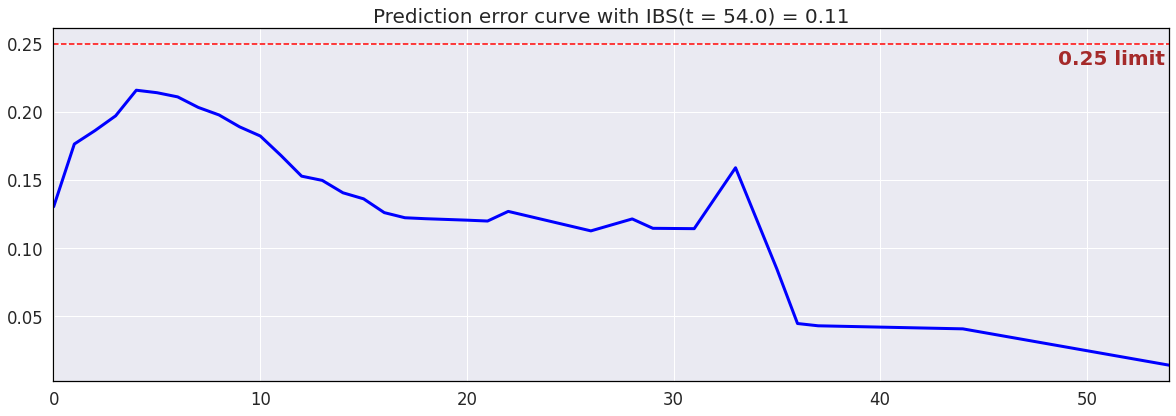

IBS: 0.11


In [ ]:
from pysurvival.models.survival_forest import RandomSurvivalForestModel
rsf = RandomSurvivalForestModel(num_trees=3000)
rsf.fit(X_train, T_train, E_train,
        max_features="sqrt", max_depth=5, min_node_size=30)


#### 5 - Cross Validation / Model Performances
c_index = concordance_index(rsf, X_test, T_test, E_test) #0.81
print('C-index: {:.2f}'.format(c_index))

ibs = integrated_brier_score(rsf, X_test, T_test, E_test, t_max=60,
            figure_size=(20, 6.5) )
print('IBS: {:.2f}'.format(ibs))

In [ ]:
from pysurvival.models.svm import LinearSVMModel
svm_model = LinearSVMModel()
svm_model.fit(X_train, T_train, E_train, init_method='he_uniform',
    with_bias = True, lr = 0.5,  tol = 1e-3,  l2_reg = 1e-3)

#### 5 - Cross Validation / Model Performances
c_index = concordance_index(svm_model, X_test, T_test, E_test) #0.93
print('C-index: {:.2f}'.format(c_index))

Performing Newton-Raphson optimization: 
 * Iteration #1 - Loss = 55.816 - ||grad||^2 = 72.41669 - ||diff_w|| = 16.70998
 * Iteration #2 - Loss = 14.088 - ||grad||^2 = 36.49707 - ||diff_w|| = 7.52053
 * Iteration #3 - Loss = 4.359 - ||grad||^2 = 20.36622 - ||diff_w|| = 4.12405
 * Iteration #4 - Loss = 1.401 - ||grad||^2 = 11.52956 - ||diff_w|| = 2.22738
 * Iteration #5 - Loss = 0.511 - ||grad||^2 = 6.41675 - ||diff_w|| = 1.16922
 * Iteration #6 - Loss = 0.254 - ||grad||^2 = 3.36841 - ||diff_w|| = 0.58221
 * Iteration #7 - Loss = 0.187 - ||grad||^2 = 1.71306 - ||diff_w|| = 0.28908
 * Iteration #8 - Loss = 0.169 - ||grad||^2 = 0.87008 - ||diff_w|| = 0.14814
 * Iteration #9 - Loss = 0.173 - ||grad||^2 = 0.45607 - ||diff_w|| = 0.08240
 * Iteration #10 - Loss = 0.176 - ||grad||^2 = 0.43217 - ||diff_w|| = 0.05150
 * Iteration #11 - Loss = 0.176 - ||grad||^2 = 0.27340 - ||diff_w|| = 0.02732
 * Iteration #12 - Loss = 0.177 - ||grad||^2 = 0.19486 - ||diff_w|| = 0.01798
 * Iteration #13 - Loss =

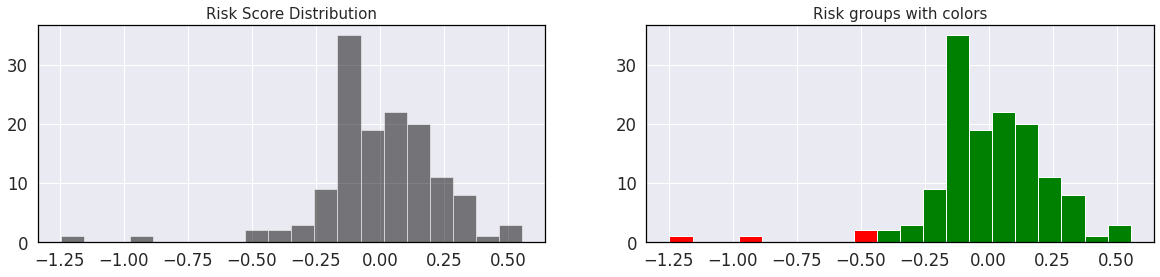

In [ ]:
from pysurvival.utils.display import create_risk_groups

risk_groups = create_risk_groups(model=svm_model, X=X_test,
    use_log = True,  num_bins=20,  figure_size=(20, 4),
    low={'lower_bound':-3.5, 'upper_bound':-0.5, 'color':'red'},
    medium={'lower_bound':-0.5, 'upper_bound':0.5,'color':'green'},
    high={'lower_bound':0.5, 'upper_bound':2.1,  'color':'blue'}
    )